# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [1]:
import numpy as np
from scipy.stats import rv_discrete

n = [10, 25]
dvalues = []

for params in n:
    xk = np.arange(1, 2 * params + 1)
    pk = [np.log(x) for x in xk]
    k = 1 / sum(pk)
    pk = [k * p for p in pk]
    rv = rv_discrete(values=(xk, pk))
    dvalues.append(rv)


### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

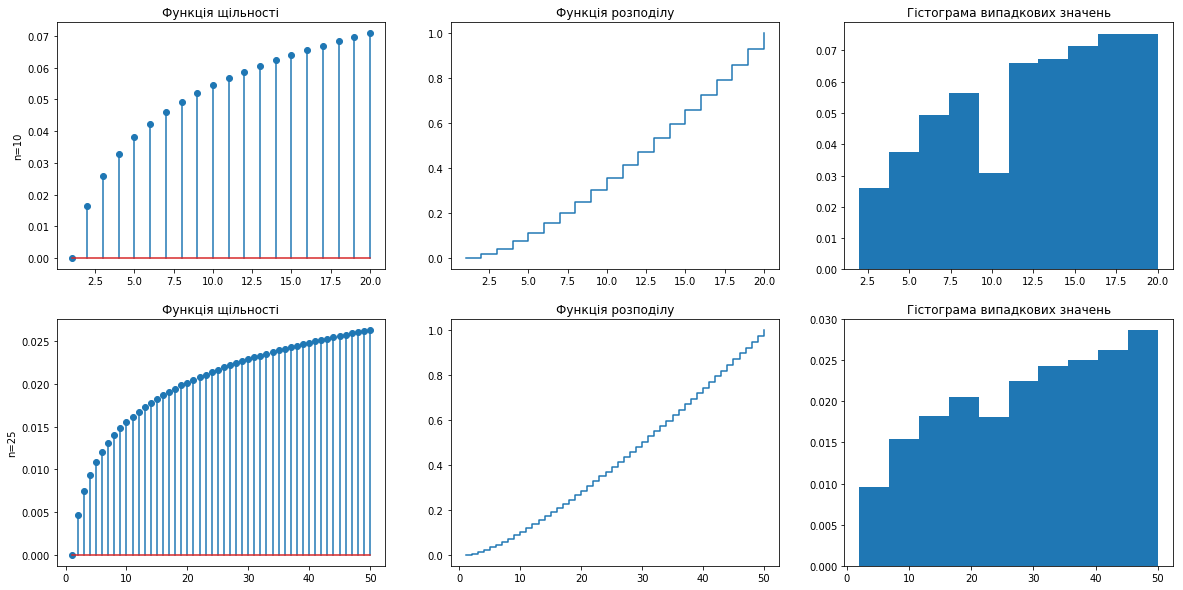

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))
i = 0
for n, dv in zip([10, 25], dvalues):
    x = np.arange(1, n * 2 + 1)
    
    i += 1
    plt.subplot(2, 3, i)
    plt.stem(x, dv.pmf(x))
    plt.title("Функція щільності")
    plt.ylabel("n={}".format(n))
    
    i += 1
    plt.subplot(2, 3, i)
    plt.plot(x, dv.cdf(x), drawstyle='steps-post')
    plt.title("Функція розподілу")
    
    i += 1
    plt.subplot(2, 3, i)
    rvs = dv.rvs(size=10000)
    plt.hist(rvs, bins=10, density=True)
    plt.title("Гістограма випадкових значень")
    

### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [3]:
import numpy as np

for n, dv in zip([10, 25], dvalues):
    x = np.arange(1, 2 * n + 1)
    y = dv.pmf(x)
    even_prob = sum(y[1::2])
    odd_prob = sum(y[::2])
    print("n={}\nProbability of even number is {}\nProbability of odd number is {}\n".format(n, even_prob, odd_prob))

n=10
Probability of even number is 0.5205046299279227
Probability of odd number is 0.47949537007207715

n=25
Probability of even number is 0.5073640739858903
Probability of odd number is 0.49263592601410955



### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [4]:
import numpy as np

for n, dv in zip([10, 25], dvalues):
    rvs = dv.rvs(size=10000)
    even_prob = len(list(filter(lambda i: i % 2 == 0, rvs))) / 10000
    odd_prob = len(list(filter(lambda i: i % 2 != 0, rvs))) / 10000
    print("n={}\nProbability of even number is {}\nProbability of odd number is {}\n".format(n, even_prob, odd_prob))

n=10
Probability of even number is 0.5278
Probability of odd number is 0.4722

n=25
Probability of even number is 0.5041
Probability of odd number is 0.4959

